# **第7章: 単語ベクトル**

*単語の類似度計算や単語アナロジーなどを通して，単語ベクトルの取り扱いを修得します．さらに，クラスタリングやベクトルの可視化を体験します．*

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．


<mark>\*\*\* 気をつけると良さそうなこと \*\*\*</mark>
- 元の学習済みベクトルがそれなりの大きさなのでひとつの問題を解くために数十分〜数時間かかる場合もある
    - 重い処理を何度も回さなくて済むように適当なタイミングで中間ファイルを切り出すことを意識する
    - 試行錯誤する場合は、対象データの一部を抽出した小さめサイズのデータを使う
    - 計算量や計算効率、処理速度を意識したコーディングのありがたみを知る
- 利用可能な Python パッケージ for NLP は既に多々用意されている
    - どう動くかの具体的なイメージを"知識として持っておく"ことはもちろん大事。一方で、コードを書くときに何よりも大事なのは"とにかく正確に動く"こと。下手に自分で頑張るよりも、プロが整備した既存ツールを積極的に利用する
    - 有名所は numpy, scipy, matplotlib, sklearn, gensim などで、本章でも利用可能


## 60 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [3]:
from pymagnitude import Magnitude
#python -m pymagnitude.converter -i /home/kai/100knock-crash-2023/trainee_kai/chapter07/data/GoogleNews-vectors-negative300.bin -o /home/kai/100knock-crash-2023/trainee_kai/chapter07/data/GoogleNews-vectors-negative300.magnitude
#上のコマンドをターミナルで実行したらエラーが出たので
#"/home/kai/.pyenv/versions/miniconda3-4.7.12/envs/nlp100cc-py3.9/lib/python3.9/site-packages/pymagnitude/converter.py", line 364
#のkeyed_vectors.index2wordを
#keyed_vectors.index_to_keyに書き換えて上手くいった
vectors = Magnitude("/home/kai/100knock-crash-2023/trainee_kai/chapter07/work/GoogleNews-vectors-negative300.magnitude")
print(vectors.query("United_States")[:10])


[-0.0168867 -0.0225916  0.1099916  0.081695  -0.0684595 -0.0346862
 -0.0474653 -0.0360553  0.0511164 -0.0266992]


## 61 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [29]:
print(vectors.similarity("United_States", "U.S."))


0.73107743
1.0000001


## 62 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
top_ten = vectors.most_similar("United_States", topn = 10) # Most similar by key
for word in top_ten:
    print(f'{word[0]}:{word[1]}')


Unites_States:0.7877248525619507
Untied_States:0.7541370391845703
United_Sates:0.74007248878479
U.S.:0.7310774326324463
theUnited_States:0.6404393911361694
America:0.6178410053253174
UnitedStates:0.6167311668395996
Europe:0.6132988929748535
countries:0.6044804453849792
Canada:0.6019070148468018


## 63 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
vec = vectors.query("Spain") - vectors.query("Madrid") + vectors.query("Athens")
top_ten = vectors.most_similar(vec, topn = 10)
for word in top_ten:
    print(f'{word[0]}:{word[1]}')

print('\n')
top_ten = vectors.most_similar(positive=['Spain','Athens'],negative=['Madrid'])
for word in top_ten:
    print(f'{word[0]}:{word[1]}')

Athens:0.9246159791946411
Greece:0.8450406789779663
Aristeidis_Grigoriadis:0.6868201494216919
Ioannis_Drymonakos:0.6802126169204712
Greeks:0.6676907539367676
Ioannis_Christou:0.6615874767303467
Hrysopiyi_Devetzi:0.6429167985916138
Heraklio:0.6379331350326538
Athens_Greece:0.6331617832183838
Lithuania:0.6329237222671509


Greece:0.6898480653762817
Aristeidis_Grigoriadis:0.5606848001480103
Ioannis_Drymonakos:0.5552908778190613
Greeks:0.545068621635437
Ioannis_Christou:0.5400862097740173
Hrysopiyi_Devetzi:0.5248444080352783
Heraklio:0.5207760334014893
Athens_Greece:0.516880989074707
Lithuania:0.5166865587234497
Iraklion:0.5146791338920593


## 64 アナロジーデータでの実験
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [5]:
!wget -nc http://download.tensorflow.org/data/questions-words.txt
!head questions-words.txt

ファイル `questions-words.txt' はすでに存在するので、取得しません。

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [6]:
with open('./questions-words.txt','r') as f1, open('./work/questions-words-mod.txt','w') as f2:
    for line in f1:
        line = line.split()
        if line[0] == ':':
            f2.write(' '.join(line) + '\n')
        else:
            top = vectors.most_similar(positive=[line[1],line[2]],negative=[line[0]])[0]
            f2.write(' '.join(line) + ' ' + top[0] + ' ' + str(top[1]) + '\n')


## 65 アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [1]:
with open('./work/questions-words-mod.txt','r') as f:
    sem_total = 0
    sem_correct = 0
    syn_total = 0
    syn_correct = 0
    category = 0
    for line in f:
        line = line.split()
        if line[0] == ':':
            category += 1
        else:
            if category <= 5:
                sem_total += 1
            else:
                syn_total += 1
            if line[3] == line[4]:
                if category <= 5:
                    sem_correct +=1
                else:
                    syn_correct += 1
print(f'semantic analogy:{sem_correct/sem_total}')
print(f'syntactic analogy:{syn_correct/syn_total}')

semantic analogy:0.7308602999210734
syntactic analogy:0.7400468384074942


## 66 WordSimilarity-353での評価
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [3]:
!wget -nc https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
%cd /home/kai/100knock-crash-2023/trainee_kai/chapter07/data/wordsim353
# !head -10 './combined.csv'
#人間の類似度判定に、単語ベクトルにより計算される類似度を付け加える
wordsim353 = []
with open('./combined.csv', 'r') as f:
    next(f)#最初の行だけ抜かす
    for line in f:
        lines = line.split(',')
        lines[2] = float(lines[2].strip())#改行を取り除いて、文字列から数値に
        lines.append(vectors.similarity(lines[0], lines[1]))
        wordsim353.append(lines)

#最初の数行確認
for line in range(5):
    print(wordsim353[line])

/home/kai/100knock-crash-2023/trainee_kai/chapter07/data/wordsim353
['love', 'sex', 6.77, 0.26393777]
['tiger', 'cat', 7.35, 0.51729625]
['tiger', 'tiger', 10.0, 1.0000001]
['book', 'paper', 7.46, 0.3634626]
['computer', 'keyboard', 7.62, 0.39639166]


In [4]:
#スピアマン相関係数
import numpy as np
from scipy.stats import spearmanr
# print(np.array(wordsim353).T)
human = np.array(wordsim353).T[2]
w2v = np.array(wordsim353).T[3]
correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数: {correlation}')

スピアマン相関係数: 0.6849564489532377


## 67 k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [15]:
#国名に関する単語ベクトルを取得
%cd /home/kai/100knock-crash-2023/trainee_kai/chapter07/data
countries = set()
with open ('questions-words.txt','r') as f:
    category = 0
    for line in f:
        line = line.split()
        if line[0] == ':':
            category += 1
            continue
        if category > 2:#2個目のカテゴリーまで国名関連
            break
        countries.add(line[1])

countries = list(countries)

countries_vec = [vectors.query(country) for country in countries]

from sklearn.cluster import KMeans
import seaborn as sns
# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit_predict(countries_vec)

print(countries)
print(kmeans.labels_)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

/home/kai/100knock-crash-2023/trainee_kai/chapter07/data


/home/kai/.pyenv/versions/miniconda3-4.7.12/envs/nlp100cc-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['Bulgaria', 'Angola', 'Cuba', 'Hungary', 'Iraq', 'Thailand', 'Austria', 'Ghana', 'Nigeria', 'Kenya', 'Liberia', 'Senegal', 'Malta', 'Switzerland', 'Mozambique', 'Samoa', 'Bahamas', 'Tajikistan', 'Madagascar', 'Vietnam', 'Zimbabwe', 'Estonia', 'Canada', 'Armenia', 'Zambia', 'Belgium', 'Pakistan', 'Ireland', 'Lebanon', 'Kazakhstan', 'Rwanda', 'Gambia', 'Australia', 'Fiji', 'Venezuela', 'Slovenia', 'Turkmenistan', 'Azerbaijan', 'Serbia', 'Poland', 'Indonesia', 'Uruguay', 'Liechtenstein', 'Turkey', 'Eritrea', 'Gabon', 'Slovakia', 'Tunisia', 'Italy', 'Mali', 'China', 'Japan', 'Namibia', 'Philippines', 'Montenegro', 'Afghanistan', 'Algeria', 'Norway', 'Chile', 'Lithuania', 'England', 'Jamaica', 'Portugal', 'Kyrgyzstan', 'Honduras', 'Bhutan', 'Denmark', 'Oman', 'Belize', 'Peru', 'Georgia', 'Uzbekistan', 'Somalia', 'Sweden', 'France', 'Nicaragua', 'Qatar', 'Syria', 'Morocco', 'Belarus', 'Russia', 'Ecuador', 'Greenland', 'Moldova', 'Laos', 'Albania', 'Malawi', 'Mauritania', 'Nepal', 'Uganda', 

## 68 Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

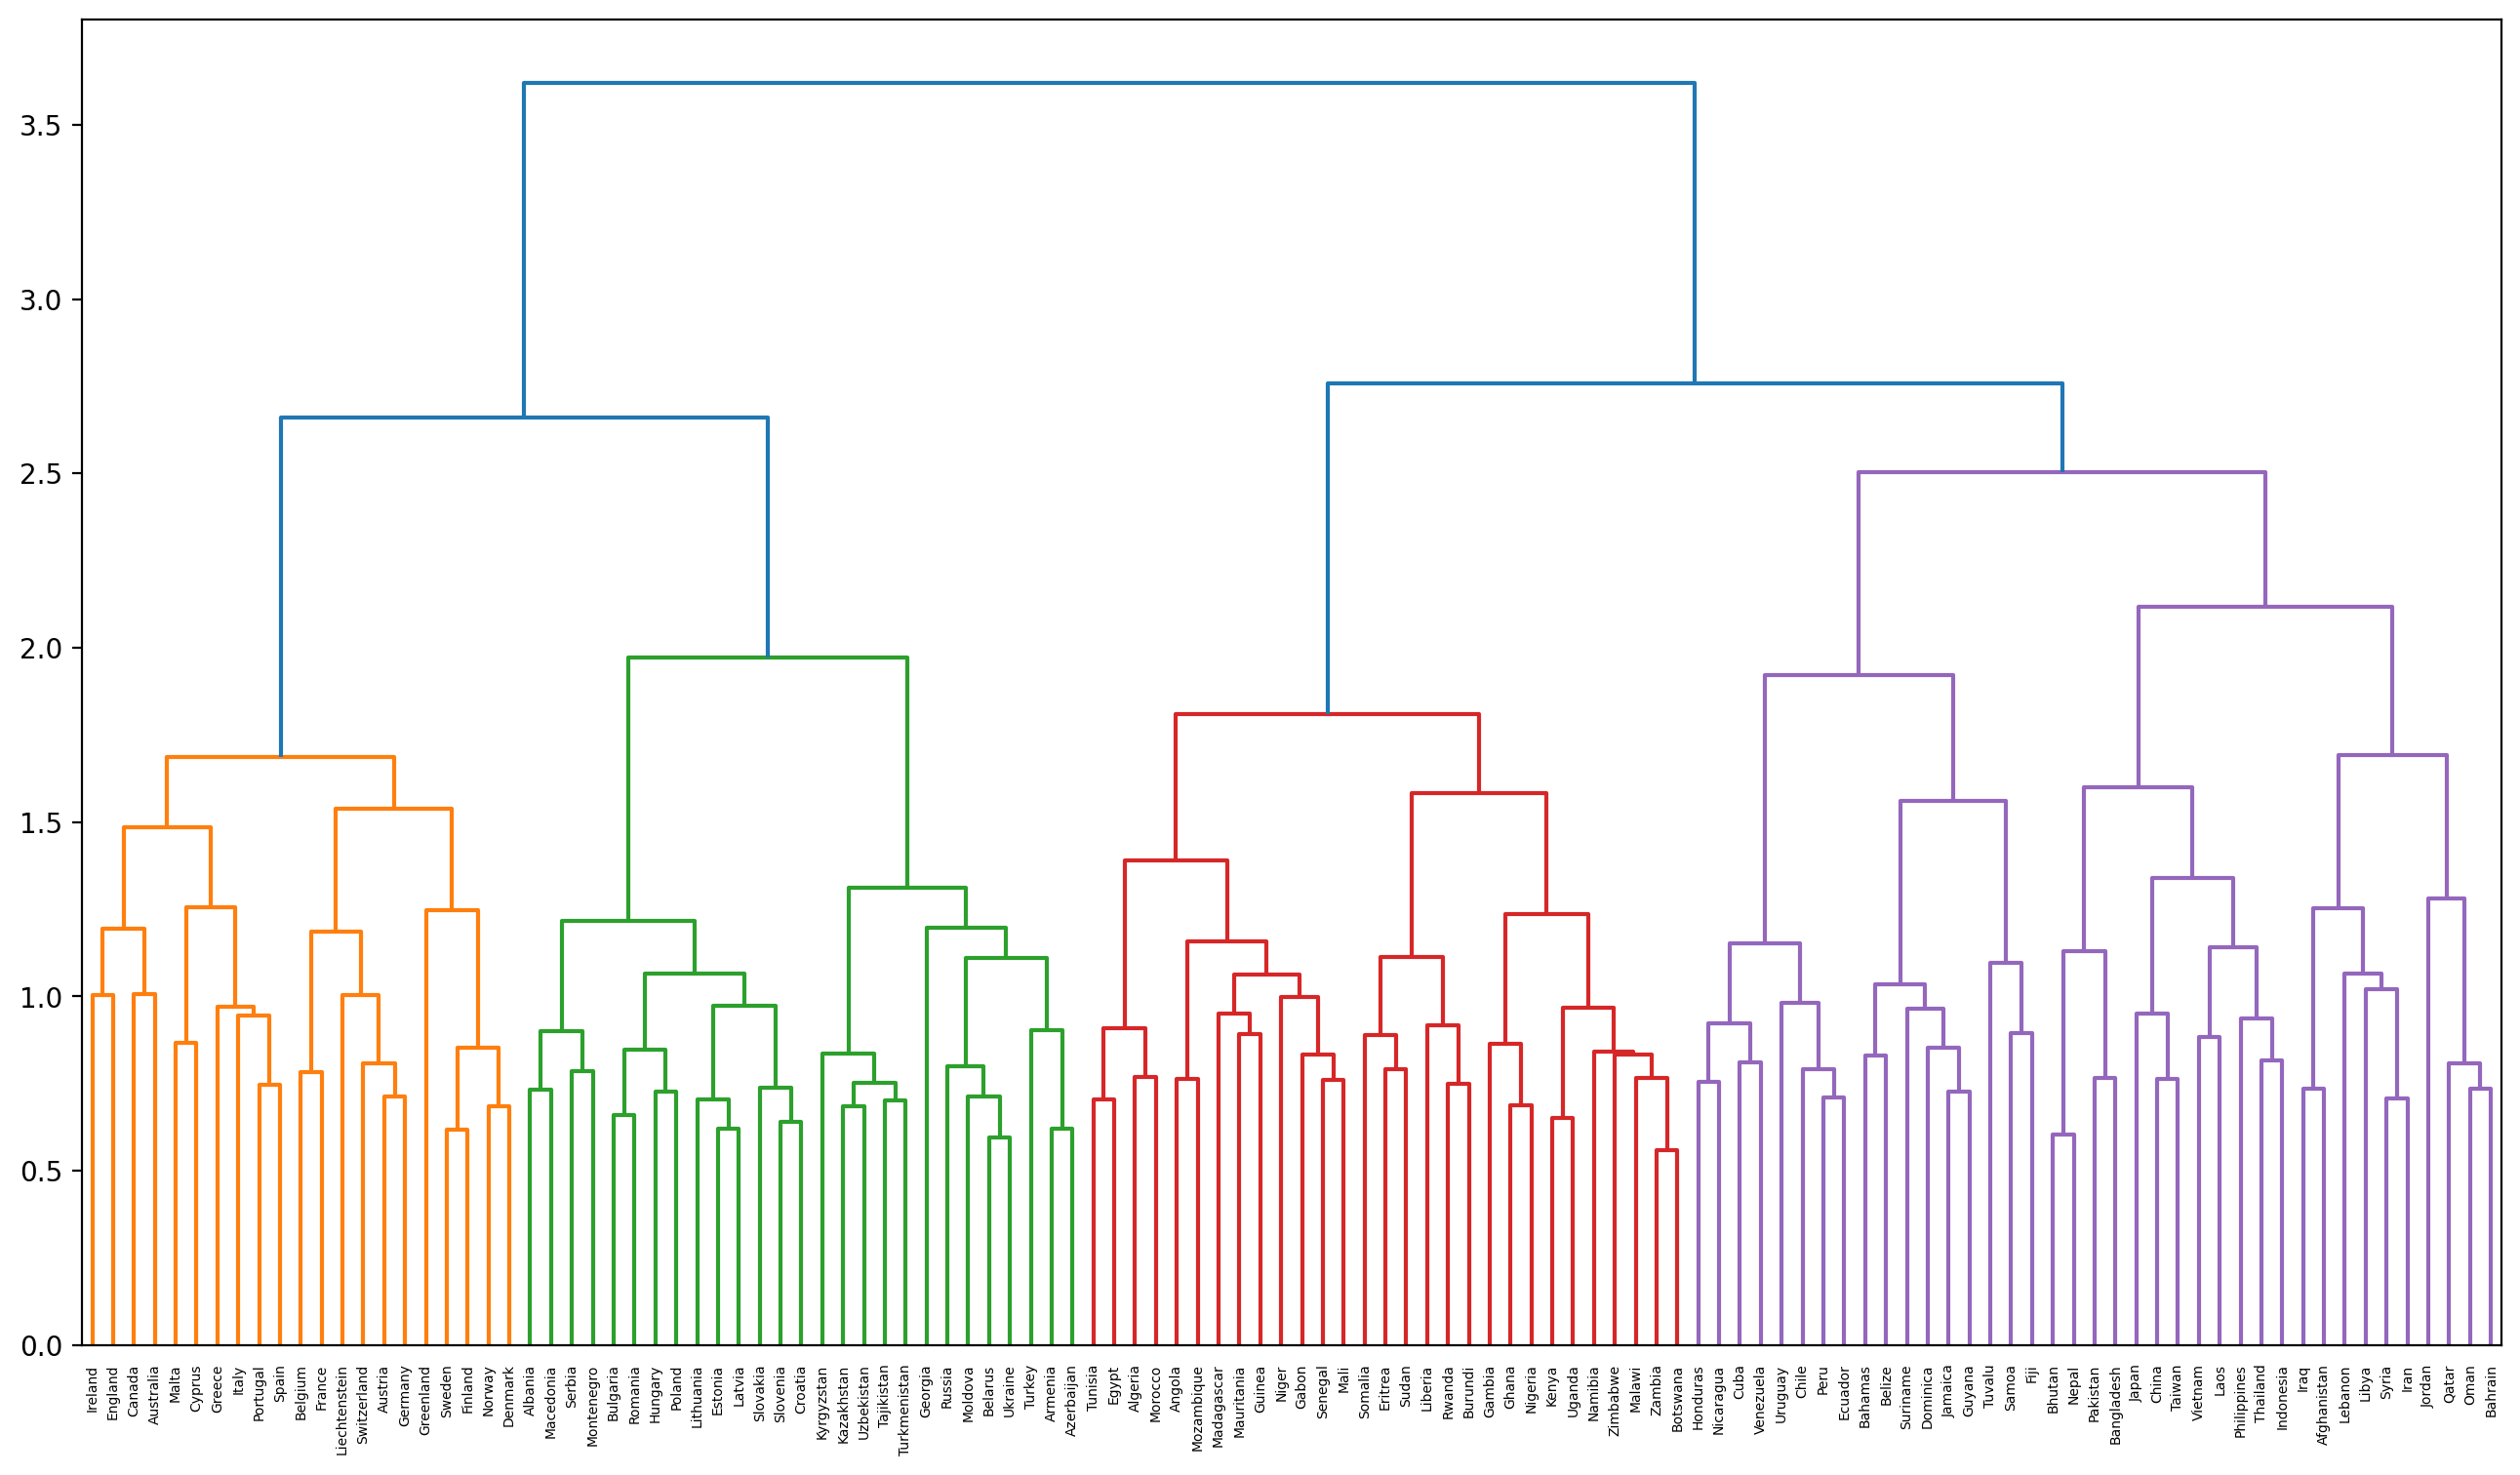

In [16]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(countries_vec, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=countries)
plt.show()

## 69 t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

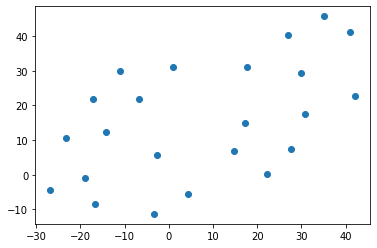

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
embedded_vectors = tsne.fit_transform(np.array(countries_vec))
for i,v in enumerate(countries):
    tmp_df = [ddf[1] == v]
    plt.scatter(tmp_df['col1'],  
                tmp_df['col2'],
                label = v,
                color = colors[i])
plt.show()
